# Proyek Analisis Data - Bike Sharing Dataset
##### Bike sharing dataset merupakan dataset yang berisikan data terkait proses persewaan sepeda di Washington DC pada tahun 2011-2012. Dataset ini menjadi menarik karena memiliki korelasi dengan kondisi lingkungan dan musim yang ada. Karakteristik dataset ini menarik untuk digunakan dalam baik pembelajaran maupun penelitian. Dataset ini dapat menggambarkan kondisi mobilitas pada sebuah kota.

*   Nama              : Muhammad Hanif Al Faithoni
*   Email             : hanifalfaithoni@gmail.com | m002d4ky2849@bangkit.academy
*   Username Dicoding : nipanip

### 1) Menyiapkan library yang dibutuhkan

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Data Wrangling

### a) Gathering Data

In [11]:
# mengimport file day.csv
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# mengimport file hour.csv
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### b) Assessing Data

#### Menilai tabel day_df

In [13]:
day_df.sample(5)
# pada field season, yr, mth, weekday, workingday, weathersit seharusnya merupakan jenis data kategorial, tetapi pada tabel ini diwakilkan oleh data kuantitatif
# seharusnya kolom yr dan mth tidak diperlukan karena sudah memiliki field dteday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
400,401,2012-02-05,1,1,2,0,0,0,2,0.265833,0.264521,0.687917,0.175996,318,2629,2947
391,392,2012-01-27,1,1,1,0,5,1,2,0.425000,0.415383,0.741250,0.342667,269,3187,3456
461,462,2012-04-06,2,1,4,0,5,1,1,0.403333,0.390767,0.377083,0.300388,1807,4653,6460
33,34,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550
72,73,2011-03-14,1,0,3,0,1,1,1,0.325217,0.332000,0.496957,0.136926,359,1687,2046


In [14]:
# memulai dengan mencari informasi umum terkait parameter pada table day_df
day_df.info()
print("Jumlah duplikasi : ", day_df.duplicated().sum())
# nampak tidak terdapat missing value pada tabel day_df, tetapi terdapat kesalahan tipe data
# seharusnya dteday merupakan datetime bukan object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi :  0


In [15]:
# mengetahui gambaran umum data pada tabel day_df
# memiliki 731 records
# deskripsi fields tabel day_df
# - instant: record index
#	- dteday : date
#	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
#	- yr : year (0: 2011, 1:2012)
#	- mnth : month ( 1 to 12)
# - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#	- weekday : day of the week
#	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#	+ weathersit :
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
#	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#	- hum: Normalized humidity. The values are divided to 100 (max)
#	- windspeed: Normalized wind speed. The values are divided to 67 (max)
#	- casual: count of casual users
#	- registered: count of registered users
#	- cnt: count of total rental bikes including both casual and

day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### Menilai tabel hour_df

In [16]:
hour_df.sample(5)
# pada field season, yr, mth, hr, weekday, workingday, weathersit seharusnya merupakan jenis data kategorial, tetapi pada tabel ini diwakilkan oleh data kuantitatif
# seharusnya kolom yr dan mth tidak diperlukan karena sudah memiliki field dteday

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2880,2881,2011-05-04,2,0,5,22,0,3,1,1,0.38,0.3939,0.62,0.2239,9,80,89
14143,14144,2012-08-17,3,1,8,12,0,5,1,1,0.82,0.2424,0.41,0.2239,110,255,365
2836,2837,2011-05-03,2,0,5,2,0,2,1,2,0.56,0.5303,0.78,0.2537,0,5,5
16621,16622,2012-11-30,4,1,11,8,0,5,1,2,0.22,0.2576,0.80,0.0896,20,709,729
14229,14230,2012-08-21,3,1,8,2,0,2,1,2,0.58,0.5455,0.88,0.2836,1,7,8


In [17]:
# memulai dengan mencari informasi umum terkait parameter pada table day_df
hour_df.info()
print("Jumlah duplikasi : ", hour_df.duplicated().sum())
# nampak tidak terdapat missing value dan duplicated data pada tabel hour_df, tetapi terdapat kesalahan tipe data
# seharusnya dteday merupakan datetime bukan object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi :  0


In [18]:
# mengetahui gambaran umum data pada tabel hour_df
# memiliki 731 records
# deskripsi fields tabel day_df
# - instant: record index
#	- dteday : date
#	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
#	- yr : year (0: 2011, 1:2012)
#	- mnth : month ( 1 to 12)
# - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#	- weekday : day of the week
#	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#	+ weathersit :
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
#	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#	- hum: Normalized humidity. The values are divided to 100 (max)
#	- windspeed: Normalized wind speed. The values are divided to 67 (max)
#	- casual: count of casual users
#	- registered: count of registered users
#	- cnt: count of total rental bikes including both casual and

hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### c) Cleaning Data

#### Membersihkan tabel day_df

In [19]:
# mengubah tipe data dteday menjadi datetime
datetime_columns = ["dteday"]
for c in datetime_columns:
  day_df[c] = pd.to_datetime(day_df[c])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [20]:
day_df.drop(columns=['yr', 'mnth', 'holiday'], inplace=True)
day_df.sample(5)
# drop field yr dan mnth karena sudah terncantum pada field dteday
# drop field holiday karena data yang kurang jelas dan setelah diamati tidak terlalu berguna untuk menjawab pertanyaan kita

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
612,613,2012-09-04,3,2,1,1,0.725833,0.686888,0.755000,0.236321,867,5997,6864
485,486,2012-04-30,2,1,1,2,0.464167,0.457696,0.570000,0.171638,665,4907,5572
530,531,2012-06-14,2,4,1,1,0.648333,0.624383,0.569583,0.253733,1180,6183,7363
434,435,2012-03-10,1,6,0,1,0.287500,0.277767,0.350417,0.225750,968,3150,4118
352,353,2011-12-19,4,1,1,1,0.276667,0.280933,0.637500,0.172896,260,3143,3403


In [21]:
# mapping hari, field weekday menjadi data kategorial
day ={
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
}

day_df['weekday'] = day_df['weekday'].map(day)
day_df.sample(5)

,instant,dteday,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
698,699,2012-11-29,4,Thursday,1,1,0.280870,0.298422,0.555652,0.115522,243,5080,5323
463,464,2012-04-08,2,Sunday,0,1,0.500000,0.492425,0.275833,0.232596,2230,2939,5169
667,668,2012-10-29,4,Monday,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
562,563,2012-07-16,3,Monday,1,1,0.763333,0.724125,0.645000,0.164187,1088,5742,6830
677,678,2012-11-08,4,Thursday,1,1,0.352174,0.341891,0.333478,0.347835,340,4975,5315


In [22]:
# mengganti nama field weekday menjadi day
day_df = day_df.rename(columns={'weekday': 'day'})
day_df.sample(5)

,instant,dteday,season,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
85,86,2011-03-27,2,Sunday,0,2,0.253043,0.250339,0.493913,0.184300,472,1221,1693
113,114,2011-04-24,2,Sunday,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191
686,687,2012-11-17,4,Saturday,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
421,422,2012-02-26,1,Sunday,0,1,0.279167,0.268308,0.410000,0.205229,515,2874,3389
541,542,2012-06-25,3,Monday,1,1,0.715833,0.654042,0.504167,0.300383,1139,5640,6779


In [23]:
# mapping field season, field season menjadi data kategorial
seasonal = {
    1:'Springer',
    2:'Summer',
    3:'Fall',
    4:'Winter'
}

day_df['season'] = day_df['season'].map(seasonal)

In [24]:
# mapping field workingday, field workingday menjadi data kategorial
status = {
    1:'workingday',
    0:'holiday'
}
day_df['workingday'] = day_df['workingday'].map(status)

In [25]:
# mengganti field workingday menjadi day_status
day_df = day_df.rename(columns={'workingday': 'day_status'})

In [26]:
# mapping field weathersit, field weathersit menjadi data kategorial
weather ={
    1: 'clear',
    2: 'cloudy',
    3: 'rain',
    4: 'storm'
}
day_df['weathersit'] = day_df['weathersit'].map(weather)

In [27]:
# mengganti field weathersit menjadi weather
day_df = day_df.rename(columns={'weathersit': 'weather'})

In [28]:
# menormalisasi suhu menjadi celcius, 41x suhu yang tercatat
day_df['temp'] = day_df['temp'] * 41

In [29]:
# menormalisasi suhu menjadi celcius, 50x suhu yang tercatat
day_df['atemp'] = day_df['atemp'] * 50

In [30]:
# menormalisasi kelembapan, 100x kelembapan yang tercatat
day_df['hum'] = day_df['hum'] * 100

In [31]:
# menormalisasi kecepatan angin, 67x kecepatan angin yang tercatat
day_df['windspeed'] = day_df['windspeed'] * 67

In [32]:
# memodifikasi nama untuk field temp, atemp, hum, windspeed
day_df = day_df.rename(columns={'temp': 'temp(°C)'})
day_df = day_df.rename(columns={'atemp': 'atemp(°C)'})
day_df = day_df.rename(columns={'hum': 'hum(%)'})
day_df = day_df.rename(columns={'windspeed': 'windspeed(km/h)'})

In [33]:
day_df.sample(10)
# day_df.describe()

,instant,dteday,season,day,day_status,weather,temp(°C),atemp(°C),hum(%),windspeed(km/h),casual,registered,cnt
604,605,2012-08-27,Fall,Monday,workingday,clear,28.836653,32.73440,73.0417,8.625111,989,5928,6917
70,71,2011-03-12,Springer,Saturday,holiday,clear,13.495847,16.28750,59.4583,14.791925,724,1408,2132
264,265,2011-09-22,Fall,Thursday,workingday,cloudy,25.761653,27.74815,90.2083,8.584375,555,4240,4795
476,477,2012-04-21,Summer,Saturday,holiday,clear,23.370000,27.14605,68.2917,19.000329,2541,4083,6624
172,173,2011-06-22,Fall,Wednesday,workingday,clear,30.066653,34.69145,70.7500,11.541554,661,3846,4507
594,595,2012-08-17,Fall,Friday,workingday,clear,29.656653,12.12000,57.0833,15.500718,1483,5665,7148
371,372,2012-01-07,Springer,Saturday,holiday,clear,16.126653,19.53895,53.1667,11.708786,1070,3451,4521
146,147,2011-05-27,Summer,Friday,workingday,clear,27.948347,31.85040,65.3750,16.125493,871,3808,4679
427,428,2012-03-03,Springer,Saturday,holiday,cloudy,16.980847,20.67460,62.1250,10.792293,956,3110,4066
352,353,2011-12-19,Winter,Monday,workingday,clear,11.343347,14.04665,63.7500,11.584032,260,3143,3403


#### Membersihkan tabel hour_df

In [34]:
# mengubah tipe data dteday menjadi datetime
datetime_columns = ["dteday"]
for c in datetime_columns:
  hour_df[c] = pd.to_datetime(hour_df[c])

# drop field yr dan mnth karena sudah terncantum pada field dteday
# drop field holiday karena data yang kurang jelas dan setelah diamati tidak terlalu berguna untuk menjawab pertanyaan kita
hour_df.drop(columns=['yr', 'mnth', 'holiday'], inplace=True)

# mapping hari, field weekday menjadi data kategorial
day ={
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
}

hour_df['weekday'] = hour_df['weekday'].map(day)

# mapping field season, field season menjadi data kategorial
seasonal = {
    1:'Springer',
    2:'Summer',
    3:'Fall',
    4:'Winter'
}

hour_df['season'] = hour_df['season'].map(seasonal)

# mapping field workingday, field workingday menjadi data kategorial
status = {
    1:'workingday',
    0:'holiday'
}
hour_df['workingday'] = hour_df['workingday'].map(status)

# mapping field weathersit, field weathersit menjadi data kategorial
weather ={
    1: 'clear',
    2: 'cloudy',
    3: 'rain',
    4: 'storm'
}
hour_df['weathersit'] = hour_df['weathersit'].map(weather)

# menormalisasi suhu menjadi celcius, 41x suhu yang tercatat
hour_df['temp'] = hour_df['temp'] * 41

# menormalisasi suhu menjadi celcius, 50x suhu yang tercatat
hour_df['atemp'] = hour_df['atemp'] * 50

# menormalisasi kelembapan, 100x kelembapan yang tercatat
hour_df['hum'] = hour_df['hum'] * 100

# menormalisasi kecepatan angin, 67x kecepatan angin yang tercatat
hour_df['windspeed'] = hour_df['windspeed'] * 67

In [35]:
# mengganti nama field weekday menjadi day
hour_df = hour_df.rename(columns={'weekday': 'day'})

# mengganti field workingday menjadi day_status
hour_df = hour_df.rename(columns={'workingday': 'day_status'})

# mengganti field weathersit menjadi weather
hour_df = hour_df.rename(columns={'weathersit': 'weather'})

# memodifikasi nama untuk field temp, atemp, hum, windspeed
hour_df = hour_df.rename(columns={'temp': 'temp(°C)'})
hour_df = hour_df.rename(columns={'atemp': 'atemp(°C)'})
hour_df = hour_df.rename(columns={'hum': 'hum(%)'})
hour_df = hour_df.rename(columns={'windspeed': 'windspeed(km/h)'})

In [36]:
hour_df.sample(10)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season           17379 non-null  object        
 3   hr               17379 non-null  int64         
 4   day              17379 non-null  object        
 5   day_status       17379 non-null  object        
 6   weather          17379 non-null  object        
 7   temp(°C)         17379 non-null  float64       
 8   atemp(°C)        17379 non-null  float64       
 9   hum(%)           17379 non-null  float64       
 10  windspeed(km/h)  17379 non-null  float64       
 11  casual           17379 non-null  int64         
 12  registered       17379 non-null  int64         
 13  cnt              17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int6

## 3) Exploratory Data Analysis

### a) Business question

#### Pada musim apa penyewaan sepeda dilakukan paling banyak dan paling sedikit?

#### Kapan penyewaan sepeda paling banyak dan paling sedikit terjadi

#### Penyewaan sepeda lebih banyak terjadi saat holiday atau workingday?

#### Jumlah penyewaan sepeda tertinggi terjadi pada jam berapa pada setiap musim?

### b) Explore day_df

In [37]:
day_df.sample(10)

,instant,dteday,season,day,day_status,weather,temp(°C),atemp(°C),hum(%),windspeed(km/h),casual,registered,cnt
666,667,2012-10-28,Winter,Sunday,holiday,cloudy,19.577500,23.38855,69.4583,26.666536,998,3461,4459
17,18,2011-01-18,Springer,Tuesday,workingday,cloudy,8.883347,11.61665,86.1667,9.833925,9,674,683
172,173,2011-06-22,Fall,Wednesday,workingday,clear,30.066653,34.69145,70.7500,11.541554,661,3846,4507
177,178,2011-06-27,Fall,Monday,workingday,cloudy,27.982500,31.85020,65.8333,7.208396,854,3854,4708
531,532,2012-06-15,Summer,Friday,workingday,clear,26.205847,29.98770,58.9583,11.833339,1563,6102,7665
551,552,2012-07-05,Fall,Thursday,workingday,clear,33.927500,38.06835,45.7917,12.999943,1405,4836,6241
450,451,2012-03-26,Summer,Monday,workingday,clear,18.279153,21.93750,47.7917,25.917007,795,4763,5558
389,390,2012-01-25,Springer,Wednesday,workingday,clear,12.060847,14.74105,64.3750,10.791757,467,3803,4270
285,286,2011-10-13,Winter,Thursday,workingday,cloudy,24.155847,27.59020,89.6667,9.499729,290,2623,2913
614,615,2012-09-06,Fall,Thursday,workingday,cloudy,28.563347,32.76645,81.0417,9.542207,611,5592,6203


In [51]:
# menghitung total penyewaan sepeda setiap musim
total_per_season_df = day_df.groupby('season')['cnt'].sum()

# musim dengan jumlah penyewaan sepeda paling banyak dan paling sedikit
highest_rent_month = total_per_season_df.idxmax()
lowest_rent_month = total_per_season_df.idxmin()

print(highest_rent_month)
print(lowest_rent_month)

total_per_season_df.to_csv('dashboard/total_per_season.csv')

Fall
Springer


In [39]:
day_df.describe(include="all")

,instant,dteday,season,day,day_status,weather,temp(°C),atemp(°C),hum(%),windspeed(km/h),casual,registered,cnt
count,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,Saturday,workingday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [52]:
# musim paling banyak dan palling sedikit penyewaan sepeda
season_rent_df = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
season_rent_df
season_rent_df.to_csv('dashboard/season_rent.csv')

In [53]:
# kapan paling banyak dan paling sedikit penyewaan sepeda terjadi
month_rent_df = day_df.groupby(by="dteday").cnt.sum().sort_values(ascending=False).reset_index()
print(month_rent_df.loc[month_rent_df['cnt'].idxmax()])
print(month_rent_df.loc[month_rent_df['cnt'].idxmin()])
# month_rent_df
month_rent_df.to_csv('dashboard/month_rent.csv')

dteday    2012-09-15 00:00:00
cnt                      8714
Name: 0, dtype: object
dteday    2012-10-29 00:00:00
cnt                        22
Name: 730, dtype: object


### c) Explore hour_df

In [42]:
hour_df.sample(10)

,instant,dteday,season,hr,day,day_status,weather,temp(°C),atemp(°C),hum(%),windspeed(km/h),casual,registered,cnt
4071,4072,2011-06-23,Fall,13,Thursday,workingday,cloudy,31.16,35.605,62.0,19.0012,37,149,186
15660,15661,2012-10-19,Winter,17,Friday,workingday,rain,25.42,30.305,69.0,23.9994,48,377,425
13727,13728,2012-07-31,Fall,4,Tuesday,workingday,clear,27.06,30.305,83.0,6.0032,0,6,6
5240,5241,2011-08-11,Fall,6,Thursday,workingday,clear,25.42,30.305,65.0,11.0014,5,101,106
13951,13952,2012-08-09,Fall,12,Thursday,workingday,clear,34.44,37.880,44.0,7.0015,85,192,277
2439,2440,2011-04-16,Summer,13,Saturday,holiday,rain,18.86,22.725,94.0,35.0008,9,49,58
12553,12554,2012-06-12,Summer,6,Tuesday,workingday,cloudy,24.60,27.275,88.0,8.9981,6,130,136
7424,7425,2011-11-10,Winter,23,Thursday,workingday,cloudy,13.94,16.665,57.0,11.0014,9,73,82
460,461,2011-01-21,Springer,5,Friday,workingday,clear,9.84,9.850,60.0,27.9993,1,4,5
7139,7140,2011-10-30,Winter,2,Sunday,holiday,clear,9.02,10.605,87.0,19.0012,7,43,50


In [43]:
hour_df.describe(include="all")

,instant,dteday,season,hr,day,day_status,weather,temp(°C),atemp(°C),hum(%),windspeed(km/h),casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Saturday,workingday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,11.546752,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,6.000000,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,12.000000,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,18.000000,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,23.000000,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [54]:
# sepeda lebih banyak dipinjam saat holiday atau working day
daystatus_rent_df = hour_df.groupby(by="day_status").cnt.sum().sort_values(ascending=False).reset_index()
daystatus_rent_df
daystatus_rent_df.to_csv('dashboard/daystatus_rent.csv')

In [55]:
# jam puncak penyewaan sepeda tertinggi pada setiap musim
hourly_rent = hour_df.groupby(by=["season", "hr"])["cnt"].sum().reset_index()

max_rent_hour_df = hourly_rent.loc[hourly_rent.groupby(by="season")["cnt"].idxmax()]

print("Jam dg jumlah peminjaman sepeda tertinggi untuk setiap musim:")
print(max_rent_hour_df)
max_rent_hour_df.to_csv('dashboard/max_rent_hour.csv')

Jam dg jumlah peminjaman sepeda tertinggi untuk setiap musim:
      season  hr     cnt
17      Fall  17  107562
41  Springer  17   47780
65    Summer  17   95468
89    Winter  17   86050


## 4) Data Visualization

### a) Musim apa penyewaan sepeda dilakukan paling banyak dan paling sedikit?

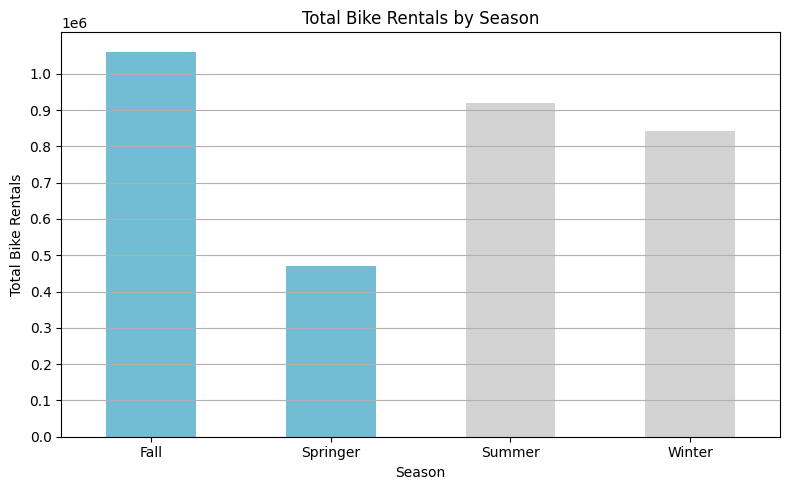

In [56]:
plt.figure(figsize=(8, 5))
total_per_season_df.plot(kind='bar', color=["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3"])
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=0)
plt.yticks(range(0, int(total_per_season_df.max()) + 1, 100000))
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Berdasarkan hasil visualisasi data di bawah, dapat disimpulkan bahwa penyewaan sepeda paling banyak terjadi pada season Fall dan paling sedikit pada season springer

### b) Kapan penyewaan sepeda paling banyak dan paling sedikit terjadi?

Berdasarkan visualisasi data tersebut dapa disimpulkan bahwa penyewaan sepeda paling banyak terjadi pada dteday    2012-09-15 00:00:00
cnt                      8714
Name: 0, dtype: object
Berdasarkan visualisasi data tersebut dapa disimpulkan bahwa penyewaan sepeda paling sedikit terjadi pada dteday    2012-10-29 00:00:00
cnt                        22
Name: 730, dtype: object


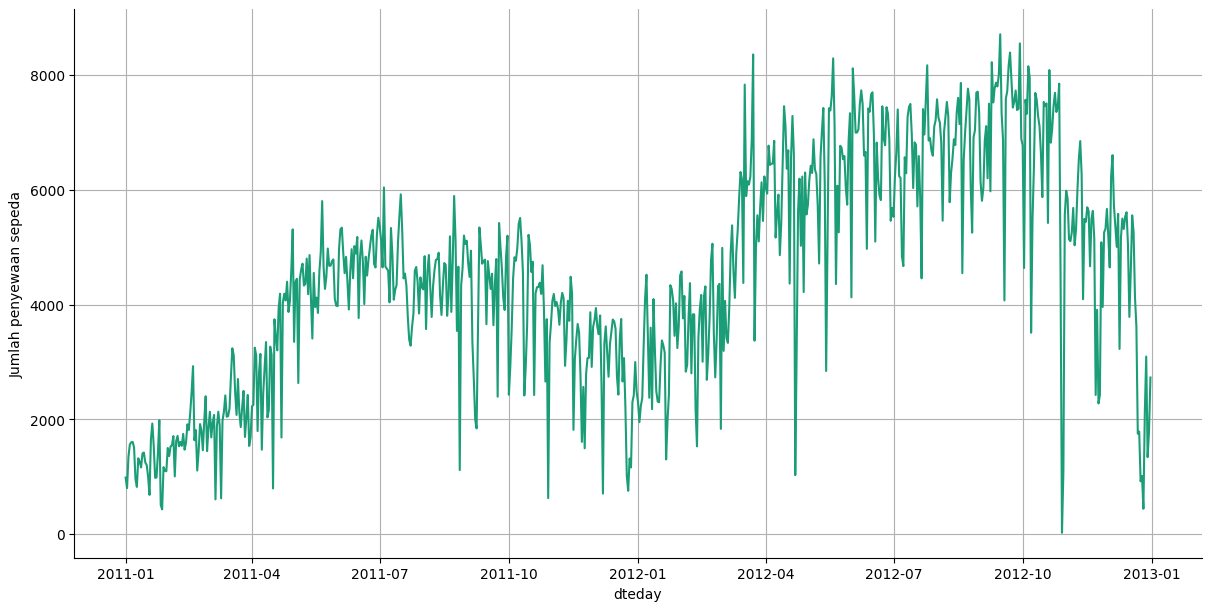

In [57]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dteday']
  ys = series['cnt']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
df_sorted = month_rent_df.sort_values('dteday', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dteday')
plt.ylabel('Jumlah penyewaan sepeda')
plt.grid(True)
print("Berdasarkan visualisasi data tersebut dapa disimpulkan bahwa penyewaan sepeda paling banyak terjadi pada", month_rent_df.loc[month_rent_df['cnt'].idxmax()])
print("Berdasarkan visualisasi data tersebut dapa disimpulkan bahwa penyewaan sepeda paling sedikit terjadi pada",month_rent_df.loc[month_rent_df['cnt'].idxmin()])

### c) Penyewaan sepeda lebih banyak terjadi saat workingday atau holiday?

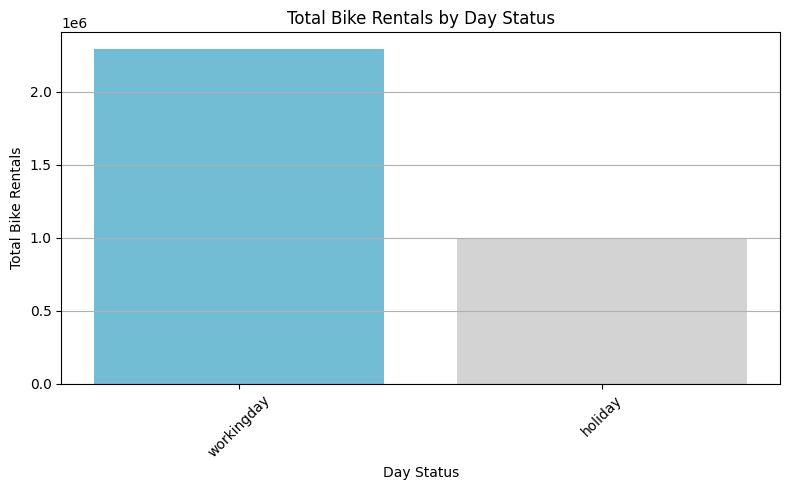

In [58]:
plt.figure(figsize=(8, 5))
plt.bar(daystatus_rent_df['day_status'], daystatus_rent_df['cnt'], color=["#72BCD4", "#D3D3D3"])
plt.title('Total Bike Rentals by Day Status')
plt.xlabel('Day Status')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Berdasarkan visualisasi data di bawa, dapat disimpulkan bahwa status hari menentukan banyaknya penyewaan sepeda.
# Penyewaan sepeda lebih banyak terjadi pada saat workingday

### d) Jumlah penyewaan sepeda tertinggi terjadi pada jam berapa pada setiap musim?

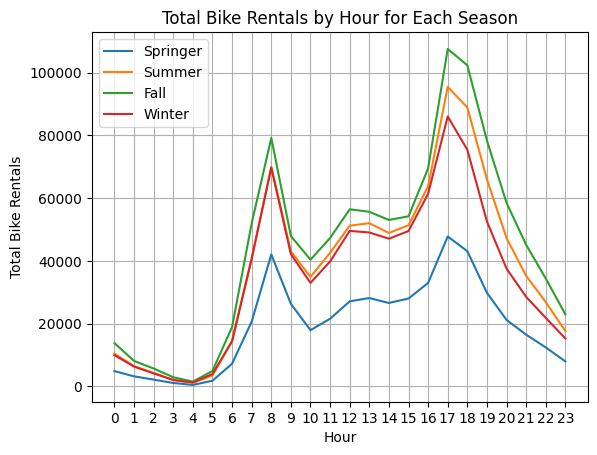

In [49]:
for season in hour_df['season'].unique():
    season_data = hourly_rent[hourly_rent['season'] == season]
    plt.plot(season_data['hr'], season_data['cnt'], label=season)

plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Hour for Each Season')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()
# Berdsarkan visualisasi data di bawah dapat disimpulkan bahwa penyewaan sepeda tertinggi terjadi pada jam 17 untuk setiap musim